In [3]:
import os
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
def train_val_generators(training_dir, validation_dir):

    train_datagen = ImageDataGenerator(rescale=1./255.)

    train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

    validation_datagen = ImageDataGenerator(rescale=1./255.)

    validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                  batch_size=16,
                                                                  class_mode='categorical',
                                                                  target_size=(150, 150))

    return train_generator, validation_generator

In [5]:
training_dir = '/kaggle/input/face-datasets/Acne/Train'
validation_dir = '/kaggle/input/face-datasets/Acne/Validation'
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 10789 images belonging to 3 classes.
Found 5176 images belonging to 3 classes.


In [6]:
mobilenet =  MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in mobilenet.layers:
    layer.trainable = False

model = Sequential([
    mobilenet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

17225924/17225924 [==============================] - 0s 0us/step


In [7]:
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
675/675 [==============================] - 135s 188ms/step - loss: 0.1014 - accuracy: 0.9623 - val_loss: 0.0297 - val_accuracy: 0.9845
Epoch 2/10
675/675 [==============================] - 34s 50ms/step - loss: 0.0429 - accuracy: 0.9827 - val_loss: 0.0188 - val_accuracy: 0.9919
Epoch 3/10
675/675 [==============================] - 34s 50ms/step - loss: 0.0305 - accuracy: 0.9876 - val_loss: 0.0371 - val_accuracy: 0.9857
Epoch 4/10
675/675 [==============================] - 35s 52ms/step - loss: 0.0238 - accuracy: 0.9910 - val_loss: 0.0194 - val_accuracy: 0.9927
Epoch 5/10
675/675 [==============================] - 44s 65ms/step - loss: 0.0213 - accuracy: 0.9911 - val_loss: 0.0191 - val_accuracy: 0.9925
Epoch 6/10
675/675 [==============================] - 34s 50ms/step - loss: 0.0130 - accuracy: 0.9946 - val_loss: 0.0526 - val_accuracy: 0.9851
Epoch 7/10
675/675 [==============================] - 34s 50ms/step - loss: 0.0093 - accuracy: 0.9962 - val_loss: 0.0288 - val_accurac

In [9]:

true_classes = validation_generator.classes

class_labels = list(validation_generator.class_indices.keys())

predicted_classes = model.predict(validation_generator)
predicted_classes = np.argmax(predicted_classes, axis=1)

precision, recall, f1_score, support = precision_recall_fscore_support(
    true_classes, predicted_classes, average='weighted', labels=np.unique(predicted_classes))

accuracy = accuracy_score(true_classes, predicted_classes)

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
print('Accuracy:', accuracy)

324/324 [==============================] - 10s 29ms/step
Precision: 0.8548798424490203
Recall: 0.8551004636785162
F1-Score: 0.8549846459916774
Accuracy: 0.8551004636785162


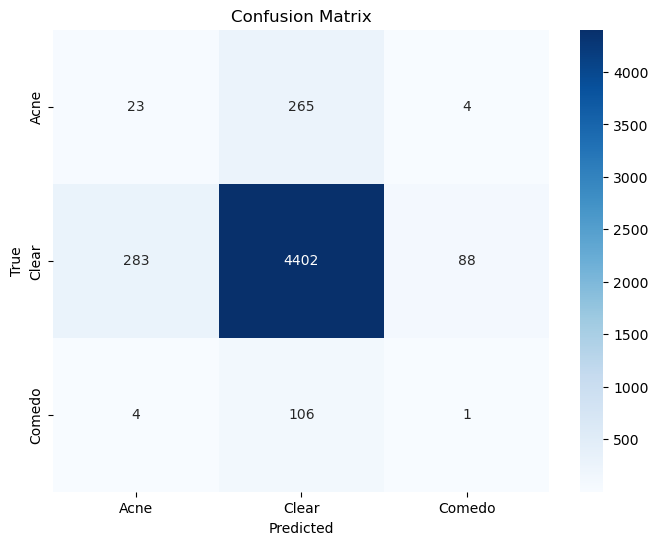

In [10]:
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

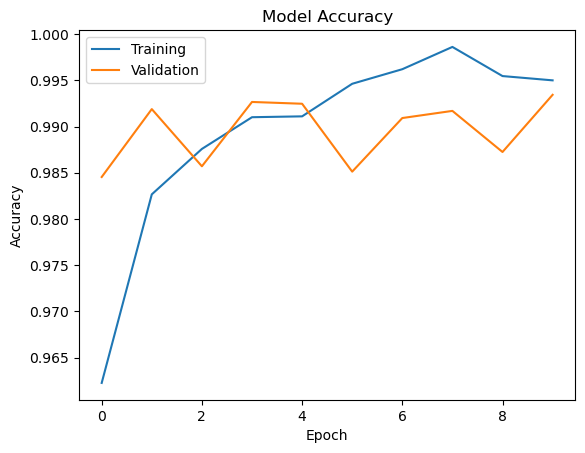

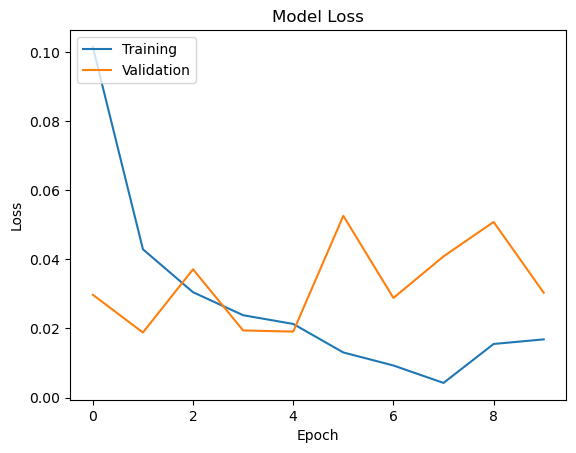

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [12]:
model.save('ImageClassificationAcne.h5')

In [13]:
model = tf.keras.models.load_model('/kaggle/working/ImageClassificationAcne.h5')


In [14]:
import pandas as pd
data = pd.read_csv('/kaggle/input/skincare-product/product_data_sliced.csv')
data

,product_id,product_name,product_url,image_url,category,ingredients,price,brand,Rating,good_reviews,bad_reviews,description
0,1323,DECLÃ‰OR Luxury Size Neroli Shower Gel 400ml,https://www.lookfantastic.com/decleor-luxury-s...,https://static.thcdn.com/images/large/original...,Body Wash,"sodium coco-sulfate, cocamidopropyl betaine, g...",17.50,DECLEOR,2,0,0,Treat yourself to a unique experience. This pr...
1,1322,La Roche-Posay Lipikar Syndet AP(+) Shower Gel...,https://www.lookfantastic.com/la-roche-posay-l...,https://static.thcdn.com/images/large/original...,Body Wash,"glycerin, sodium laureth sulfate, peg-200 hydr...",16.50,La Roche-Posay,5,5,0,is an ultra-gentle face and body wash for the...
2,1328,L'OrÃ©al Paris Men Expert Hydra Power Shower G...,https://www.lookfantastic.com/l-oreal-paris-me...,https://static.thcdn.com/images/large/original...,Body Wash,"sodium laureth sulfate, cocamidopropyl betaine...",2.99,L'oreal Paris,5,2,0,Freshen up with the
3,1332,L'OrÃ©al Paris Men Expert Clean Power Shower G...,https://www.lookfantastic.com/l-oreal-paris-me...,https://static.thcdn.com/images/large/original...,Body Wash,"sodium laureth sulfate, glycerin, sodium chlor...",2.99,L'oreal Paris,5,2,0,Invigorate your senses with
4,1338,Aveeno Baby Daily Care Hair & Body Wash 500ml,https://www.lookfantastic.com/aveeno-baby-dail...,https://static.thcdn.com/images/large/original...,Body Wash,"coco-glucoside, cocamidopropyl betaine, avena ...",7.99,Avene,2,0,0,Treat yourself to a unique experience. This pr...
...,...,...,...,...,...,...,...,...,...,...,...,...
1598,709,DECLÃ‰OR Aromessence Neroli Amara Night Balm 15ml,https://www.lookfantastic.com/decleor-aromesse...,https://static.thcdn.com/images/large/original...,Treatment,"corylus avellana flower extract , cera alba, o...",32.20,DECLEOR,3,0,0,Treat yourself to a unique experience. This pr...
1599,704,La Roche-Posay Cicaplast Baume B5 Soothing Rep...,https://www.lookfantastic.com/la-roche-posay-c...,https://static.thcdn.com/images/large/original...,Treatment,"hydrogenated polyisobutene, dimethicon, glycer...",14.00,La Roche-Posay,4,9,0,Multi-Purpose Protecting Balm
1600,705,La Roche-Posay Cicaplast Baume B5 Repairing Ba...,https://www.lookfantastic.com/la-roche-posay-c...,https://static.thcdn.com/images/large/original...,Treatment,"homosalate, panthenol, ethylhexyl salicylate, ...",8.00,La Roche-Posay,4,8,1,"Replenish the look of dry, sensitive skin with..."
1601,283,Turbo Booster C Powder,https://www.sephora.com/product/turbo-booster-...,https://static.thcdn.com/images/large/original...,Treatment,"ascorbic, acid, panthenol, zinc, pca, copper, ...",39.00,PHILOSOPHY,4,23,1,Treat yourself to a unique experience. This pr...


In [27]:
import tensorflow as tf
import numpy as np
import pandas as pd


# Load model Image Classification
image_classification_model = tf.keras.models.load_model('ImageClassificationAcne.h5')


# Load dataset skincare
skincare_data = pd.read_csv('/kaggle/input/skincare-product/product_data_sliced.csv')


# Define list of skincare ingredients
acne_ingredients = ['salicylic acid', 'benzoyl peroxide', 'Tea Tree oil']
comedo_ingredients = ['bentonite','glycolic acid', 'lactic acid']
clean_ingredients = ['Aloe Vera','Vitamin C','Ceramide','Hyaluronic Acid','Niacinamide','Glycerin','Rosehip Oil','Witch Hazel']

In [28]:
image_classification_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 3,360,451
Trainable params: 131,587
Non-trainable params: 3,228,864
_________________________________________________________________


In [29]:
# Function to recommend skincare based on Image Classification output
def recommend_skincare(image_path):
    # Load and preprocess image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(150,150,3))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = image_array / 255.0
    
    # Make prediction using Image Classification model
    predictions = image_classification_model.predict(image_array)
    predicted_class = np.argmax(predictions)
    
    
    # Filter skincare dataset based on predicted class
    if predicted_class == 0:
        filtered_data = skincare_data[skincare_data['ingredients'].str.contains('|'.join(acne_ingredients), case=False)]
    elif predicted_class == 1:
        filtered_data = skincare_data[skincare_data['ingredients'].str.contains('|'.join(comedo_ingredients), case=False)]
    else:
        filtered_data = skincare_data

    # Sort skincare dataset based on rating
    sorted_data = filtered_data.sort_values(by='Rating', ascending=False)

    # Get top recommended skincare products
    top_products = sorted_data.head(10)

    # Return recommended skincare products
    return top_products['product_name'].tolist()
    

In [32]:
# Test the recommendation system
image_path = '/kaggle/input/testing/TestingData/komedo3.jpg'  # Path to the test image
recommendations = recommend_skincare(image_path)
print("Recommended Skincare Products:")
for product in recommendations:
    print(product)

1/1 [==============================] - 0s 28ms/step
Recommended Skincare Products:
Face Mask
Face Mask
Eye Care
Cleanser
Treatment
Sun protect
Eye Care
Face Mask
Cleanser
Face Mask


NameError: name 'predictions' is not defined

Masukkan path file gambar:  /kaggle/input/testing/TestingData/komedo3.jpg


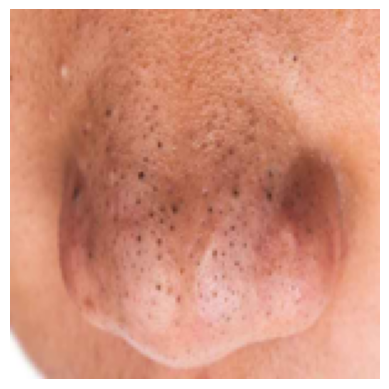

1/1 [==============================] - 0s 427ms/step
komedo3.jpg terdeteksi sebagai: Komedo
Confidence: 95.74%


In [27]:
import numpy as np
import os
import shutil
from tensorflow.keras.utils import load_img, img_to_array
from IPython.display import Image
from PIL import Image as PILImage
import matplotlib.pyplot as plt

# Mengunggah file gambar
uploaded_file = input("Masukkan path file gambar: ")
uploaded_file_name = os.path.basename(uploaded_file)

# Salin file gambar ke direktori saat ini
shutil.copyfile(uploaded_file, uploaded_file_name)

# Membaca gambar menggunakan PIL
img = PILImage.open(uploaded_file_name)
img = img.resize((150, 150))  # Mengubah ukuran gambar menjadi (150, 150)

plt.imshow(img)
plt.axis('off')
plt.show()

# Mengonversi gambar menjadi array dan melakukan normalisasi
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

# Melakukan prediksi gambar
predictions = model.predict(x)

# Menentukan label kelas
class_labels = ['Jerawat', 'Bersih', 'Komedo']
predicted_class = class_labels[np.argmax(predictions)]
confidence = np.max(predictions) * 100

# Menampilkan hasil prediksi
print(f"{uploaded_file_name} terdeteksi sebagai: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")

# Menghapus file yang diunggah
os.remove(uploaded_file_name)

In [ ]:
# pip install tensorflow-recommenders


In [ ]:
# # import tensorflow as tf
# import tensorflow_datasets as tfds
# import tensorflow_recommenders as tfrs
# import numpy as np
# import pandas as pd

# # Load the skincare dataset
# skincare_data = pd.read_csv('/kaggle/input/skincare-product/product_data_sliced.csv')  # Replace 'skincare_data.csv' with your dataset filename

# # Preprocess the dataset
# skincare_data['ingredients'] = skincare_data['ingredients'].str.lower()

# # Define the feature columns
# product_vocabulary = tf.feature_column.categorical_column_with_vocabulary_list(
#     'product_name', skincare_data['product_name'].unique().tolist())
# ingredient_vocabulary = tf.feature_column.categorical_column_with_vocabulary_list(
#     'ingredients', skincare_data['ingredients'].unique().tolist())
# print(ingredient_vocabulary)

# product_embedding = tf.feature_column.embedding_column(product_vocabulary, dimension=32)
# ingredient_embedding = tf.feature_column.embedding_column(ingredient_vocabulary, dimension=32)

# # Build the retrieval model
# class SkincareModel(tfrs.Model):
#     def __init__(self):
#         super().__init__()
#         self.product_embedding = product_embedding
#         self.ingredient_embedding = ingredient_embedding
#         self.task = tfrs.tasks.Retrieval(metrics=tfrs.metrics.FactorizedTopK(
#             candidates=skincare_data['Product'].unique().tolist()
#         ))
    
#     def compute_loss(self, features, training=False):
#         product_embeddings = self.product_embedding(features['Product'])
#         ingredient_embeddings = self.ingredient_embedding(features['Ingredients'])
        
#         return self.task(user_embeddings=ingredient_embeddings, candidate_embeddings=product_embeddings)
    
# # Create the model instance
# model = SkincareModel()

# # Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

# # Create the tf.data.Dataset
# dataset = tf.data.Dataset.from_tensor_slices(({
#     'Product': skincare_data['Product'],
#     'Ingredients': skincare_data['Ingredients']
# }, skincare_data['Rating']))

# # Train the model
# model.fit(dataset.shuffle(1000).batch(16), epochs=10)

# # Perform retrieval
# index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
# index.index_from_dataset(
#     tf.data.Dataset.from_tensor_slices(skincare_data['Ingredients'])
#     .batch(1000)
#     .map(model.ingredient_embedding)
# )

# # Get recommendations
# query = 'jerawat'  # Replace with your desired query
# _, indices = index(tf.constant([query]), k=10)
# recommendations = skincare_data.iloc[indices[0]].reset_index(drop=True)

# # Print the recommendations
# print("Recommended Skincare Products:")
# print(recommendations[['Product', 'Ingredients', 'Rating']])


In [ ]:
# import tensorflow as tf
# import tensorflow_datasets as tfds
# import tensorflow_recommenders as tfrs
# import numpy as np
# import pandas as pd

# # Load the skincare dataset
# skincare_data = pd.read_csv('/kaggle/input/skincare-product/product_data_sliced.csv')
# # Replace 'skincare_data.csv' with your dataset filename

# # # Preprocess the dataset
# skincare_data['ingredients'] = skincare_data['ingredients'].str.lower()
# skincare_data['ingredients'] = skincare_data['ingredients'].str.split(',')
# print(skincare_data['ingredients'])


# # # Filter skincare dataset based on categories (jerawat, bukan jerawat, komedo)
# # acne_data = skincare_data[(skincare_data['ingredients'] == 'salicylic acid') | (skincare_data['ingredients'] == 'benzoyl peroxide') | (skincare_data['ingredients'] == 'tea tree') | (skincare_data['ingredients'] == 'niacinamide') | (skincare_data['ingredients'] == 'sulfur')]
# # non_acne_data = skincare_data[skincare_data['ingredients'] == 'bukan jerawat']
# # comedo_data = skincare_data[skincare_data['ingredients'] == 'komedo']
# acne_ingredients = ['salicylic acid']
# acne_data = skincare_data[skincare_data['ingredients'].isin(acne_ingredients)]
# print(acne_data)

# # acne_ingredients = ['salicylic acid', 'benzoyl peroxide', 'tea tree', 'niacinamide', 'sulfur']

# # # Create vocabulary lists for embeddings
# # product_vocabulary = tf.feature_column.categorical_column_with_vocabulary_list(
# #     'Product', skincare_data['product_name'].unique().tolist())
# # acne_ingredient_vocabulary = tf.feature_column.categorical_column_with_vocabulary_list(
# #     'Ingredients', acne_data['ingredients'].unique().tolist())
# # non_acne_ingredient_vocabulary = tf.feature_column.categorical_column_with_vocabulary_list(
# #     'Ingredients', non_acne_data['ingredients'].unique().tolist())
# # comedo_ingredient_vocabulary = tf.feature_column.categorical_column_with_vocabulary_list(
# #     'Ingredients', comedo_data['ingredients'].unique().tolist())

# # # Define embedding columns for products and ingredients
# # product_embedding = tf.feature_column.embedding_column(product_vocabulary, dimension=32)
# # acne_ingredient_embedding = tf.feature_column.embedding_column(acne_ingredient_vocabulary, dimension=32)
# # non_acne_ingredient_embedding = tf.feature_column.embedding_column(non_acne_ingredient_vocabulary, dimension=32)
# # comedo_ingredient_embedding = tf.feature_column.embedding_column(comedo_ingredient_vocabulary, dimension=32)

# # # Build the retrieval model
# # class SkincareModel(tfrs.Model):
# #     def __init__(self):
# #         super().__init__()
# #         self.product_embedding = product_embedding
# #         self.acne_ingredient_embedding = acne_ingredient_embedding
# #         self.non_acne_ingredient_embedding = non_acne_ingredient_embedding
# #         self.comedo_ingredient_embedding = comedo_ingredient_embedding
# #         self.task = tfrs.tasks.Retrieval(
# #             metrics=tfrs.metrics.FactorizedTopK(
# #                 candidates=skincare_data['Product'].unique().tolist()
# #             )
# #         )
    
# #     def compute_loss(self, features, training=False):
# #         product_embeddings = self.product_embedding(features['Product'])
# #         if features['Category'] == 'jerawat':
# #             ingredient_embeddings = self.acne_ingredient_embedding(features['Ingredients'])
# #         elif features['Category'] == 'bukan jerawat':
# #             ingredient_embeddings = self.non_acne_ingredient_embedding(features['Ingredients'])
# #         elif features['Category'] == 'komedo':
# #             ingredient_embeddings = self.comedo_ingredient_embedding(features['Ingredients'])
        
# #         return self.task(user_embeddings=ingredient_embeddings, candidate_embeddings=product_embeddings)
    
# # # Create the model instance
# # model = SkincareModel()

# # # Compile the model
# # model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

# # # Create the tf.data.Dataset
# # dataset = tf.data.Dataset.from_tensor_slices(({
# #     'Product': skincare_data['Product'],
# #     'Ingredients': skincare_data['Ingredients'],
# #     'Category': skincare_data['Category']
# # }, np.zeros(len(skincare_data))))

# # # Train the model
# # model.fit(dataset.batch(32), epochs=10)

# # # Set up retrieval using trained embeddings
# # index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)

# # # Get recommendations for a specific category and ingredient
# # category = 'jerawat'
# # ingredient = 'salicylic acid'
# # _, top_k = index({
# #     'Ingredients': np.array([ingredient]),
# #     'Category': np.array([category])
# # })
# # recommended_products = top_k[0]

# # # Print recommended skincare products
# # print(f"Recommended Skincare Products for Category '{category}' and Ingredient '{ingredient}':")
# # for product in recommended_products:
# #     print(product)
